In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression

%matplotlib inline


In [3]:
data = np.loadtxt('ex1data1.txt',delimiter=',')
X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

In [4]:
len(np.ones(data.shape[0]))


97

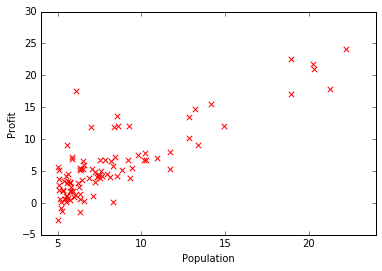

In [5]:
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population')
plt.ylabel('Profit');
plt.show()

In [6]:
def computeCost(X,y,theta = [[0],[0]]):
    m = y.size
    J=0
    
    h=X.dot(theta)
    # Cost function a mentioned in the formula [32]
    J=1/(2*m)*np.sum(np.square(h-y))
    return(J)


In [7]:
computeCost(X,y)

32.072733877455676

In [31]:
def gradientDescent(X,y,theta=[[0],[0]],iteration=1500,alpha=0.01):
    m = y.size
    
    # Initializing J_history value to zero
    J_history = np.zeros(iteration)
    
    for iter in np.arange(iteration):
        h = X.dot(theta)
        # Applying the formula in [31] for theta and performing simultaneous update
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X,y,theta)
    return(theta,J_history)

In [32]:
theta, cost_J = gradientDescent(X,y)


In [33]:
theta

array([[-3.63029144],
       [ 1.16636235]])

In [11]:
cost_J

array([ 6.73719046,  5.93159357,  5.90115471, ...,  4.48343473,
        4.48341145,  4.48338826])

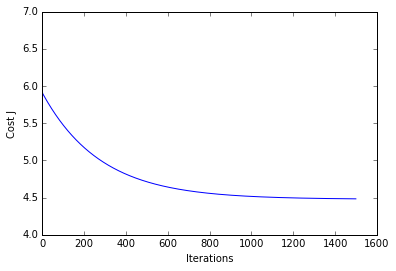

In [12]:
plt.plot(cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

In [13]:
theta.T.dot([10000,35000])

array([ 4519.7678677])

In [14]:
theta.T.dot([10000,70000])

array([ 45342.45012945])

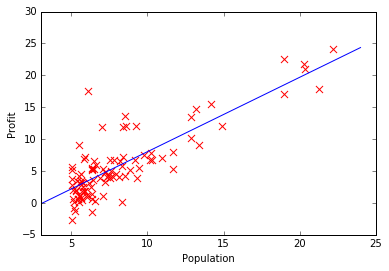

In [15]:
#xx and yy are parameters for the fitting line
xx = np.arange(1,25)
#yy is the fitted line theta(0)+theta(1)*xx
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y, s=50, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Gradient descent')

plt.xlim(3,25)
plt.xlabel('Population')
plt.ylabel('Profit')

In [16]:
data_multi = np.loadtxt('ex1data2.txt',delimiter=',')

In [19]:
X_multi = np.c_[np.ones(data_multi.shape[0]),data_multi[:,0:2]]
y_multi = np.c_[data_multi[:,2]]

In [21]:
def featureNormalize(X_multi):
    X_norm = np.c_[np.zeros(X_multi.T.shape)]
    mu = (np.zeros(X_norm.T.shape[1]))
    sigma = (np.zeros(X_norm.T.shape[1]))
    i=0
    for col in X_multi.T:
        col_mean = np.mean(col)
        col_std = np.std(col)
        mu[i]=col_mean
        sigma[i]=col_std
        temp = list()
        for row in col:
            val = (row-col_mean)/col_std
            temp.append(val)
        X_norm[i] = temp
        i=i+1
    X_norm[0] = [1]*len(X_multi)
    return X_norm.T,mu,sigma

In [22]:
X_norm, mu, sigma = featureNormalize(X_multi)

In [119]:
def computeCost(X,y,theta):
    m = y.size
    J=0
    
    h=X.dot(theta)
    # Cost function a mentioned in the formula [32]
    J=1/(2*m)*np.sum(np.square(h-y))
    return(J)


In [140]:
def gradientDescentMulti(X, y, alpha, iteration,theta):
    m = y.size
    J_history = np.zeros(iteration)
    for iter in np.arange(iteration):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X,y,theta)
    return(theta,J_history)

In [183]:
alpha_multi = 0.01
num_iters=400
theta = np.c_[np.zeros(X_norm.shape[1])]
theta,J_history = gradientDescentMulti(X_norm,y_multi,alpha_multi,num_iters,theta)a

In [185]:
theta

array([[ 334302.06399328],
       [  99411.44947359],
       [   3267.01285407]])

In [189]:
ytest = np.array([1650.,3.])
ytestscaled = [(ytest[x]-mu[x+1])/sigma[x+1] for x in range(len(ytest))]
ytestscaled.insert(0,1)
(theta.T.dot(np.c_[ytestscaled]))

array([[ 289221.54737122]])

In [190]:
ytestscaled

[1, -0.44604386032761639, -0.2260933675776883]